# Advanced Project: Long Run
## Implementing the Solow-Romer Model

In [2]:
# Install a pip package in the current Jupyter kernel. Guide HERE (https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)
import sys
!{sys.executable} -m pip install fredapi
from fredapi import Fred
fred = Fred(api_key='3bc0b64f3a9314a4a0025468233b37e7')

^C


You should consider upgrading via the 'C:\Users\robin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Q1) Calibration

A vital component of every Macroeconomic model is the "Calibration." To numerically implement a model, we need values for our parameters or calibrate our model. For example, there are two parameters in the Solow-Romer model, the growth rate of TFP and the Population growth rate. Calculate the average growth rate of TFP and Population over the last 50 years. Hint: you can't average the yearly growth rates; you have to consider compounding. 

Use these data series from FRED: TFP (RTFPNAUSA632NRUG) and Population (LFWA64TTUSM647N). You can do it manually as we have always done, or use an API. Guide [HERE](https://github.com/mortada/fredapi). Help on installation of packages through pip is [Here](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)

Show all your calculations and answers formatted in the correct units up to two decimal places.

In [149]:
TFP1 = pd.read_csv('https://github.com/TBrost/Econ_381_Solow_Romer_Model/raw/main/RTFPNAUSA632NRUG.csv')
POP1  = pd.read_csv('https://github.com/TBrost/Econ_381_Solow_Romer_Model/raw/main/LFWA64TTUSM647N.csv')
TFP = data = fred.get_series('RTFPNAUSA632NRUG')
TFP = TFP.iloc[19:70]

TFP1 = TFP[1]
#TFP1 = TFP1.iloc[19:69]
a = np.array(TFP) 

Y1 = a[0]
Y2 =  a[-1]
T = len(a)

g = ((Y2 / Y1) ** (1/T))-1
gF = g
g1 = round(g*100, 2)
print("The US has had an average TFP growth rate of " + str(g1) + "% over the last 50 years.")

The US has had an average TFP growth rate of 0.55% over the last 50 years.


In [5]:
POP = data = fred.get_series('LFWA64TTUSM647N')
POP = POP.iloc[168:780]
a = np.array(POP) 

Y1 = a[0]
Y2 =  a[-1]
T = len(a)

n = ((Y2 / Y1) ** (1/T))-1
n1 = round(n*100,2)
print("The US has had an average population growth rate of " + str(n1) + "%  over the last 50 years.")

The US has had an average population growth rate of 0.1%  over the last 50 years.


### Q2) Steady State

Now that you have parameters "g" and "n," assume these values for the rest of the parameters: $s=0.1$, $\delta=0.06$, $\alpha=0.33$, $\ell=0.01$. Solve for the value of $k=\frac{K}{AL}$ in the steady-state, $k^*$.

In [6]:
s = 0.1
delta = 0.06
alpha = 0.33
l = 0.01

z= g/l

K_star = lambda s, delta, z,l , n, alpha: ((s/(z*l +n +delta)) ** (1/ (1-alpha))) * (1-l)
K_star(s,delta, z, l,n,alpha)


1.8204870251747265

### Q3) Implementing Solow-Romer

Suppose that $K_0=1,000$, $L_0=500$, and $A_0=1.7$. Implement the Solow-Romer model in Python using the parameter values from Q2). 

__a)__ How long does it take the model to reach the steady-state? 

In [13]:

#reset variables again
s = 0.1
d = 0.06
alpha = 0.33
l = 0.01
z= g/l
K_star = lambda s, d, z,l , n, alpha: ((s/(z*l +n +d)) ** (1/ (1-alpha))) * (1-l)
K_0 = 1000
L1 = 500
A1 = 1.7

# Functions

def production_function(K, L, A, alpha, l):
    return pow(K, alpha) * pow(A * L, 1 - alpha) * (1 -l) ** (1-alpha)
kstar = lambda s, d, z, l, n, alpha: ((s/(z*l + n + d)) ** (1/ (1-alpha))) * (1-l)
kstar1 = kstar(s, delta, z, l, n, alpha)
def Y_star(l, s, z,n,d, alpha):
    return (1-l) * pow(s/(z*l+n+d), (alpha/(1-alpha)))

#change_in_captial = lambda s, l, alpha, z, n, d, k_0: s *(1-l)** (1-alpha) * k_0 - (z * l + n + delta) * k_0

print(kstar1)

1.8204870251747265


In [59]:
# Starting points for loops.
L = np.array([L1])
A = np.array([A1])
K = np.array([K_0])

# Creating an output function
output = lambda K,L,A,alpha,l: K ** alpha * (A* L) ** (1-alpha) * (1-l)**(1-alpha)

# Starting points for loops again
Y = np.array([output(K[0],L[0],A[0],alpha,l)])
C = np.array([(1-s)*Y])
t = np.array([0])
Delta_K= np.array([0])
k = np.array([K[0]/(A[0]*L[0])]) #Capital in intensive units k=K/AL
k_star = kstar(s, delta, z, l, n, alpha)

#creating the loop for the steady state period.
i = 0 #Start counter
epsilon=0.01 # while loop tolerance

while (abs(k[i] - k_star)) >epsilon: # this shows when k and kstar are the same
    i += 1    
    t = np.append(t, i) #Time vector
    L = np.append(L, L[i-1] * (1 + n)) #Labor Supply Path
    A = np.append(A, A[i-1] * (1 + z*l)) #TFP Path
    Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1]) #Change in capital stock
    K= np.append(K,K[i-1] + Delta_K[i]) #Capital Stock Path
    k = np.append(k,K[i] / (A[i] * L[i])) #Path of Capital in intensive units
    Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
    C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))

def outputs():
    print('Capital steady state: ', '{:,.2f}'.format(K_star(L, s, d, A, alpha)))
    print('Output steady state: ', '{:,.2f}'.format(Y_star(L, s, d, A, alpha)))


In [43]:
print('Reached ending condition in',time[i],'time periods')

Reached ending condition in 95 time periods


__b)__ Graph the path of $K_t$, $Y_t$, $C_t$ from their initial values until 10 periods after they reach the steady-state value $k^*$. Use the log scale. _Hint: remember that $K_t=k_tL_tA_t$_

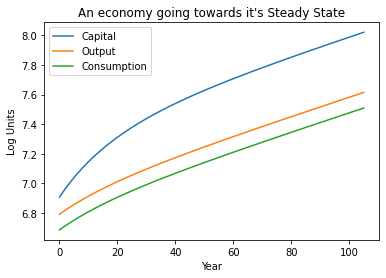

In [60]:

for i in range (i, i+10):
    i += 1    
    t = np.append(t, i)
    L = np.append(L, L[i-1] * (1 + n))
    A = np.append(A, A[i-1] * (1 + z*l))
    Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1])
    K = np.append(K,K[i-1] + Delta_K[i])
    k = np.append(k,K[i-1] / (A[i-1] * L[i-1]))
    Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
    C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))

plt.plot(t,np.log(K), label='Capital')
plt.plot(t,np.log(Y), label='Output')
plt.plot(t,np.log(C), label='Consumption')
plt.ylabel('Log Units')
plt.xlabel('Year')
plt.title("An economy going towards it's Steady State")
plt.legend()
plt.show()

__c)__ What are the values of $K_t$, $L_t$, $A_t$ when they first reached the steady-state?

In [50]:
print('When steady state was first reached;','\n','Capital:', K[40],'\n','Labor:', L[40],'\n','TFP:', A[40])

When steady state was first reached; 
 Capital: 1881.4068702675881 
 Labor: 519.545761614073 
 TFP: 2.1195722600785025


### Q4) Quantitative Experiments

Conduct the following quantitative experiments. Start the simulations at the values of capital, labor, and TFP at the steady-state you found in the last part of the previous question. Let the model follow the balanced growth path for 10 periods. Then simulate each of the following scenarios. Please include graphs for the path of $K_t$, $Y_t$, $C_t$ in the level and log scales. Add a different graph of your choosing for each scenario.

In [177]:
# Functionize

def Reset(L1,A1,K_0):
    global s
    global delta
    global alpha
    global l
    global z
    global A
    global K
    global L
    global Y
    global C
    global t
    global Delta_K
    global k
    global k_star
    global gF
    global d
    global z

    s = 0.1
    d = 0.06
    alpha = 0.33
    l = 0.01
    z= gF/l

    L = np.array([L1])
    A = np.array([A1])
    K = np.array([K_0])

    output = lambda K,L,A,alpha,l: K ** alpha * (A* L) ** (1-alpha) * (1-l)**(1-alpha)

    Y = np.array([output(K[0],L[0],A[0],alpha,l)])
    C = np.array([(1-s)*Y])
    t = np.array([0])
    Delta_K= np.array([0])
    k = np.array([K[0]/(A[0]*L[0])]) #Capital in intensive units k=K/AL
    k_star = kstar(s, delta, z, l, n, alpha)

def first10 ():# First 10 years of normal growth
    global i
    global L
    global A
    global Delta_K
    global K
    global k
    global Y
    global C
    global s
    global l
    global t
    global delta
    i = 0
    for i in range (0, 10):
        i += 1    
        t = np.append(t, i)
        L = np.append(L, L[i-1] * (1 + n))
        A = np.append(A, A[i-1] * (1 + z*l))
        Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1])
        K = np.append(K,K[i-1] + Delta_K[i])
        k = np.append(k,K[i-1] / (A[i-1] * L[i-1]))
        Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
        C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))

def while_loop(epsilon,kstar):
    global i
    global L
    global A
    global Delta_K
    global K
    global k
    global Y
    global C
    global s
    global l
    global t
    global delta
    while (abs(k[i] - kstar)) >epsilon: # this shows when k and kstar are the same
        i += 1    
        t = np.append(t, i) #Time vector
        L = np.append(L, L[i-1] * (1 + n)) #Labor Supply Path
        A = np.append(A, A[i-1] * (1 + z*l)) #TFP Path
        Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1]) #Change in capital stock
        K= np.append(K,K[i-1] + Delta_K[i]) #Capital Stock Path
        k = np.append(k,K[i] / (A[i] * L[i])) #Path of Capital in intensive units
        Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
        C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))

def Last_ten(T2):
    global i
    global L
    global A
    global Delta_K
    global K
    global k
    global Y
    global C
    global s
    global l
    global t
    global delta
    for i in range (i, i+T2):
        i += 1    
        t = np.append(t, i)
        L = np.append(L, L[i-1] * (1 + n))
        A = np.append(A, A[i-1] * (1 + z*l))
        Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1])
        K = np.append(K,K[i-1] + Delta_K[i])
        k = np.append(k,K[i-1] / (A[i-1] * L[i-1]))
        Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
        C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))

def plot_Log(title):
    plt.plot(t,np.log(K), label='Capital')
    plt.plot(t,np.log(Y), label='Output')
    plt.plot(t,np.log(C), label='Consumption')
    plt.ylabel('Log Units')
    plt.xlabel('Year')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

def plot(title):
    plt.plot(t,K, label = "Capital")
    plt.plot(t,Y, label='Output')
    plt.plot(t,C, label='Consumption')
    plt.legend()
    plt.title(title)
    plt.grid()
    plt.show()

__a)__ War destroys half of the capital in the US.

In [195]:
Reset(500,1.7,1000)
# First 10 years of normal growth

first10()

### War destroys half the capital stock (K) ###
K[i] = K[i]/2
k[i] = K[i]/(A[i]*L[i])
epsilon=0.01


while_loop(epsilon, k_star)

T2=10
Last_ten(T2)

Y = output(K,L,A,alpha,l)
C = s * Y

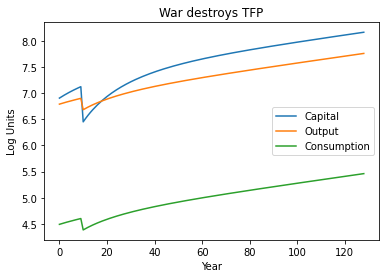

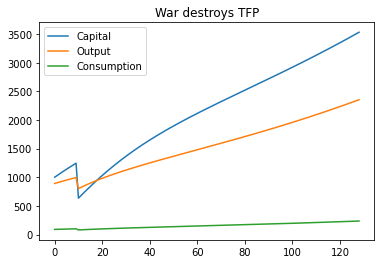

In [196]:
plot_Log("War destroys TFP")
plot("War destroys TFP")

__b)__ Millennials suddenly increase their savings rate, doubling the historical average.

In [189]:
Reset(500,1.7,1000)
# First 10 years of normal growth
first10()

### Millenial double savings ratio (s) ###
# Double the savings rate.
s=0.2

# new K* 
new_kstar = lambda s, delta, z, l, n, alpha: ((s/(z*l + n + delta)) ** (1/ (1-alpha))) * (1-l)
new_kstar = new_kstar(s, delta, z, l, n, alpha)

epsilon=0.01


while_loop(epsilon, new_kstar)

T2 = 10
Last_ten(T2)

Y = output(K,L,A,alpha,l)
C = s * Y

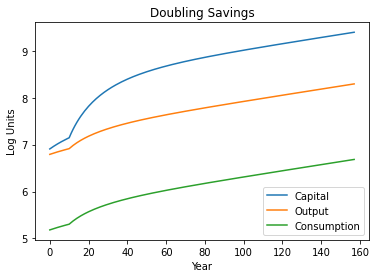

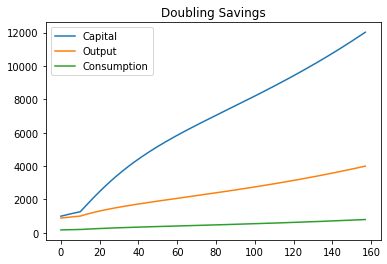

In [193]:
plot_Log("Doubling Savings")
plot("Doubling Savings")

__c)__ A peaceful advanced extraterrestrial race gives the US technology that instantly doubles TFP

In [197]:
Reset(500,1.7,1000)
# First 10 years of normal growth

first10()

### Doubling TFP (A) ###
A[i] = A[i]*2
k[i] = K[i] / (A[i]/L[i])

epsilon=0.01

while_loop(epsilon, k_star)

T2=10
Last_ten(T2)

Y = output(K,L,A,alpha,l)
C = s * Y

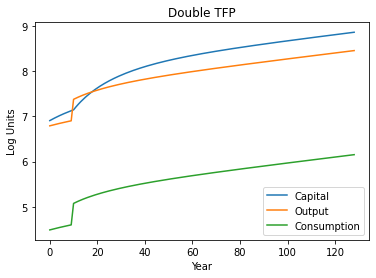

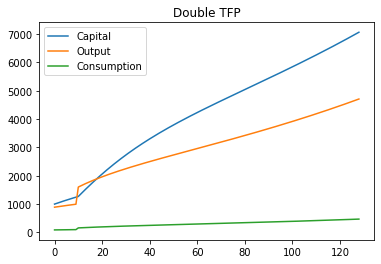

In [198]:
plot_Log("Double TFP")
plot("Double TFP")

__d)__ A scenario of your making

In [200]:
Reset(500,1.7,1000)


# First 10 years of normal growth
first10()

###
z = z*1.5
epsilon=0.01

while_loop(epsilon, k_star)

T2 = 10
Last_ten(T2)

Y = output(K,L,A,alpha,l)
C = s * Y

KeyboardInterrupt: 

In [ ]:
plot_Log("my scenario")
plot("my scenario")